In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from  tensorflow import keras
from  tensorflow.keras import layers

In [7]:
data_train_path=r"C:\Users\abhis\Downloads\Fruits_Vegetables\train"
data_test_path=r"C:\Users\abhis\Downloads\Fruits_Vegetables\test"
data_val_path=r"C:\Users\abhis\Downloads\Fruits_Vegetables\validation"

In [9]:
width=180;height=180

In [10]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(width,height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [13]:
data_cat=data_train.class_names
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [14]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(width,height),
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [15]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(width,height),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


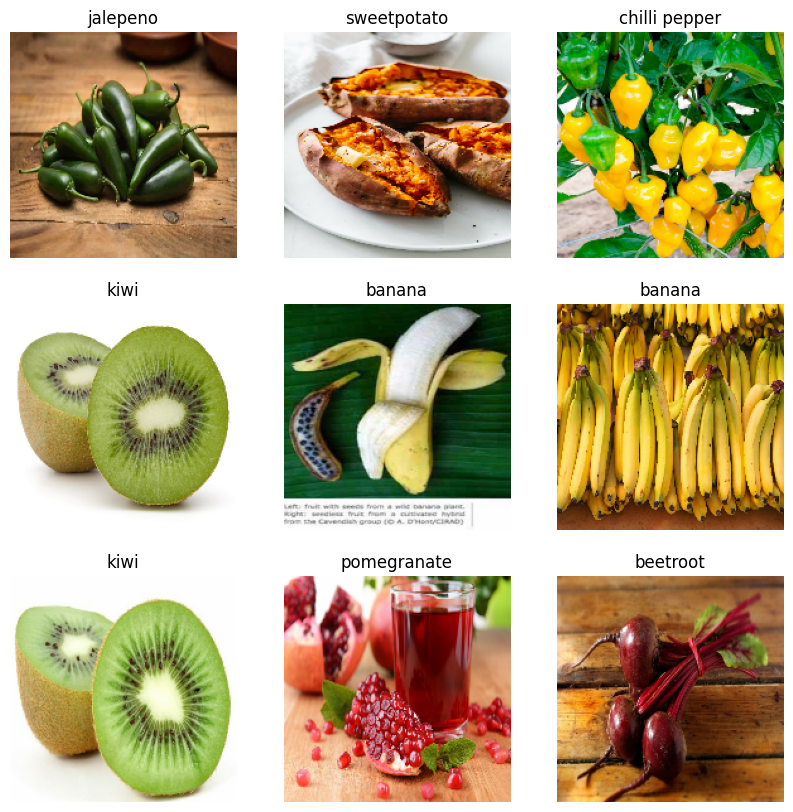

In [23]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis('off') #remove axis

In [24]:
from tensorflow.keras.models import Sequential

In [29]:
model= Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))    
])

In [30]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [33]:
epochs=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 408ms/step - accuracy: 0.0970 - loss: 3.4897 - val_accuracy: 0.3647 - val_loss: 2.1681
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 406ms/step - accuracy: 0.3349 - loss: 2.3045 - val_accuracy: 0.6353 - val_loss: 1.3864
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 431ms/step - accuracy: 0.4631 - loss: 1.7971 - val_accuracy: 0.7692 - val_loss: 0.8854
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 427ms/step - accuracy: 0.6547 - loss: 1.1683 - val_accuracy: 0.8775 - val_loss: 0.5152
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 439ms/step - accuracy: 0.7999 - loss: 0.6956 - val_accuracy: 0.8860 - val_loss: 0.5675
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 376ms/step - accuracy: 0.8836 - loss: 0.4247 - val_accuracy: 0.9259 - val_loss: 0.4647
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 415ms/step - accuracy: 0.9252 - loss: 0.2853 - val_accuracy: 0.9487 - val_loss: 0.2931
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 412ms/step - accuracy: 0.9320 - loss: 0.2347 - val_accu

In [31]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
data_test

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Text(0.5, 1.0, 'Loss')

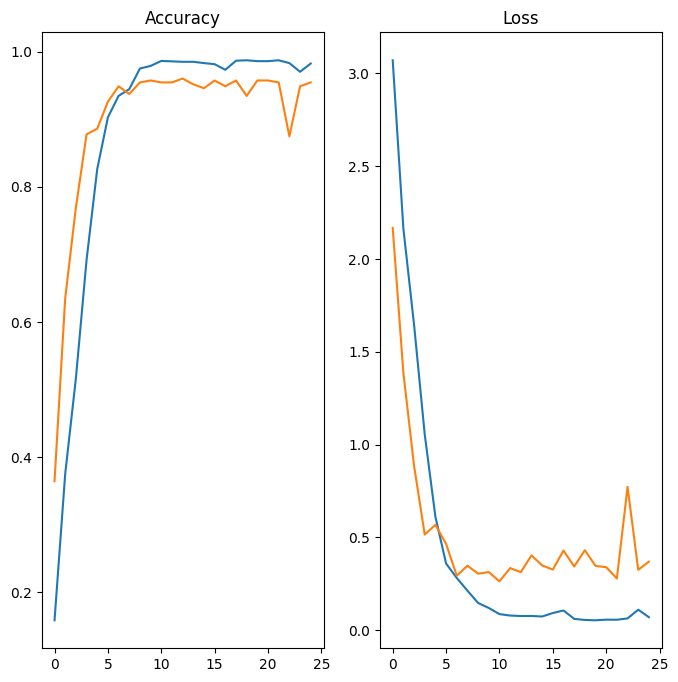

In [34]:
epochs_range=range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title("Loss")

In [55]:
model.save('ImageClassify.keras')

In [53]:
image='image.png'
image=tf.keras.utils.load_img(image,target_size=(height,width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [54]:
predict=model.predict(img_bat)
score=tf.nn.softmax(predict)
print("Veg/Fruit in Image is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(score)],np.max(score)*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Veg/Fruit in Image is lettuce with accuracy of 96.50
